In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.linalg
%matplotlib inline

Pr(0)=0.9999999999999996
Pr(1)=0.0


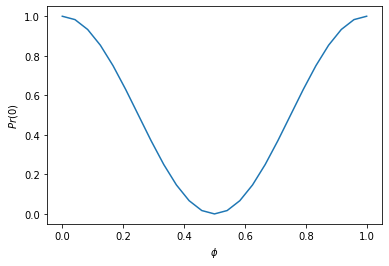

In [2]:
Zero = np.array([[1.0],
                 [0.0]])
One = np.array([[0.0],
                [1.0]])

# Simulation of Hadamard Test for Arbitrary Unitary Matrix U and vector $\psi$

def hadamard_test(si, u):
  # Hadamard matrix
  hadamard = 1./np.sqrt(2) * np.array([[1, 1],
                                     [1, -1]])
  # Input Register
  zero_tensor_si = np.kron(Zero, si)
  
  # Tensor Product of Hadamard and Identity 
  hadamard_tensor_id = np.kron(hadamard, np.eye(2))
  
  # Control Operator 
  controled = np.kron(np.outer(Zero,Zero), np.eye(2)) + np.kron(np.outer(One,One), u)
  
  # The Projection into the space generated by |0>
  p = np.kron(np.outer(Zero,Zero), np.eye(2))
  
  # Operations in Hadamard Test
  result_1 = np.matmul(hadamard_tensor_id, zero_tensor_si)
  result_2 = np.matmul(controled, result_1)
  output_register = np.matmul(hadamard_tensor_id, result_2)
  
  probablity_0 = sp.linalg.norm(np.matmul(p, output_register))**2
  
  return probablity_0 

# Pobablities for U = X and \psi = |+> and for \psi = |->


plus = (Zero + One)/sp.linalg.norm(Zero + One)

minus = (Zero - One)/sp.linalg.norm(Zero - One)

x = np.array([[0, 1],
              [1, 0]])

print('Pr(0)=' + str(hadamard_test(plus, x)))
print('Pr(1)=' + str(hadamard_test(minus, x)))

# Plot the probablities for different phi in (0,1)

X = np.linspace(0, 1, 25)

# Array for probablity of 0 for different values of phi in (0,1)
vec = []

for phi in X:
  u = np.diagflat([1, np.exp(2 * np.pi * 1j * phi)])
  vec.append(hadamard_test(One, u))
plt.plot(X, vec)
plt.ylabel('$Pr(0)$')
plt.xlabel('$\phi$')
plt.show()